In [85]:
import pandas as pd

In [86]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Acquire the Data

In [87]:
df = pd.read_csv('service_calls.csv')

In [88]:
df.shape

(495440, 17)

___

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495440 entries, 0 to 495439
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Category              495440 non-null  object 
 1   CASEID                495440 non-null  int64  
 2   OPENEDDATETIME        495440 non-null  object 
 3   SLA_Date              481300 non-null  object 
 4   CLOSEDDATETIME        441387 non-null  object 
 5   Late (Yes/No)         495440 non-null  object 
 6   Dept                  445141 non-null  object 
 7   REASONNAME            495440 non-null  object 
 8   TYPENAME              495440 non-null  object 
 9   CaseStatus            495440 non-null  object 
 10  SourceID              495440 non-null  object 
 11  OBJECTDESC            495440 non-null  object 
 12  Council District      495440 non-null  int64  
 13  XCOORD                495345 non-null  float64
 14  YCOORD                495345 non-null  float64
 15  

## Takeaways:
- most of the features we have are are objects 
    - I think they may mostly be categories
- I see that there are going to be a few nulls in some of these features

___

In [90]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
dtype: int64

## Takeaways:
- The following features contain null values
    - SLA_Date
    - CLOSEDDATETIME
    - Dept
    - XCOORD
    - YCOORD
- SLA_Date
    - I feel that there are too many to drop but I would like to look further
        - If we were to decide to drop these nulls we would be dropping 2.85% of our observations
            - Hypothetically leaving us with 481,300 observations if we only dropped this column
- CLOSEDDATETIME
    - I feel as if there are far to many observations here to drop
        - But I dont know how we would fill these null valiies
            - If we dropped these nulls we would be dropping 10.91% of our observations
                - this would leave us with 441,386 observations if we dropped ONLY this column
- Dept
    - I think this is again too many to drop, it makes up for 10.15% of our observations
        - We could just fill this with "Unknown"
- XCOORD
    - I would feel safe droping these null values
        - only 0.02% of the observations
- YCOORD
    - I would feel safe droping these null values
        - only 0.02% of the observations
            - probaby the same ones as XCOORD

___

## Department Data Info

In [91]:
df.Dept.value_counts()

Solid Waste Management       190658
Development Services         132826
Animal Care Services          75222
Trans & Cap Improvements      33684
Code Enforcement Services      5294
Customer Service               4196
Metro Health                   2827
Parks and Recreation            433
City Council                      1
Name: Dept, dtype: int64

In [92]:
#plt.figure(figsize=(16,8))
#sns.set(style="dark")
#sns.histplot(df.Dept)
#plt.xticks(rotation=90)
#plt.show()

## Takeaways:
- Why is city council so low?
- is city council the reason that Dept has so many null values?

___

## Category Data Info

In [93]:
df.Category.value_counts()

No Category                  415187
Solid Waste Services          63005
Property Maintenance           5212
Animals                        4754
Information                    4197
Scooters                       1008
Graffiti                        820
Parks                           496
Traffic Signals and Signs       438
Streets & Infrastructure        315
Historic Preservation             8
Name: Category, dtype: int64

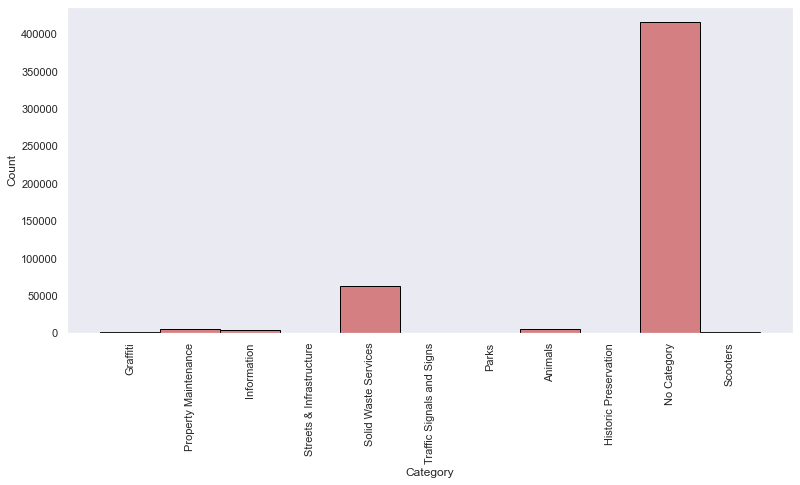

In [94]:
plt.figure(figsize=(13,6))
sns.set(style="dark")
sns.histplot(df.Category, color='indianred', edgecolor='black')
plt.xticks(rotation=90)
plt.show()

## Takeaways:
- There are a lot of calls that have gone uncategorized.
    - What is No Category?
        - what kind of calls get put into this category?
            - Maybe worth researching
- I guess no one cares about history

___

## Late Data Info

In [95]:
df['Late (Yes/No)'].value_counts()

NO     400740
YES     94700
Name: Late (Yes/No), dtype: int64

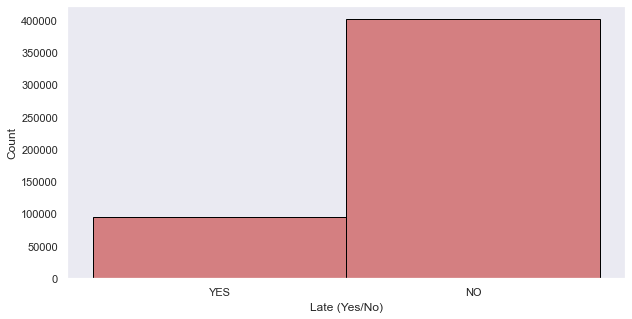

In [96]:
plt.figure(figsize=(10,5))
sns.set(style="dark")
sns.histplot(df['Late (Yes/No)'], color='indianred', edgecolor='black')
plt.show()

## Takeaways:
- We should rename 'Late (Yes/No)' to just 'Late' to make coding easier
- 80.89% of calls have been closed
- 19.11% have not been closed
    - What is causing these to not be closed?
    - how long have they been open?

___

## Reason Name Data Info

In [97]:
df.REASONNAME.value_counts()

Waste Collection                 152898
Code Enforcement                 136050
Field Operations                  75100
Miscellaneous                     30407
Traffic Operations                26148
Streets                           25816
Trades                             9590
Stormwater                         6797
Small Business                     6106
Solid Waste                        5261
Workforce Development              5250
Customer Service                   4650
311 Call Center                    4196
Food Establishments                1610
Land Development                   1094
Facility License                    908
Clean and Green                     758
Dangerous Premise                   701
Shops (Internal)                    385
Vector                              243
Historic Preservation               224
Signals                             223
Urban Forestry                      209
Traffic Engineering Design          206
Graffiti (IntExp)                   112


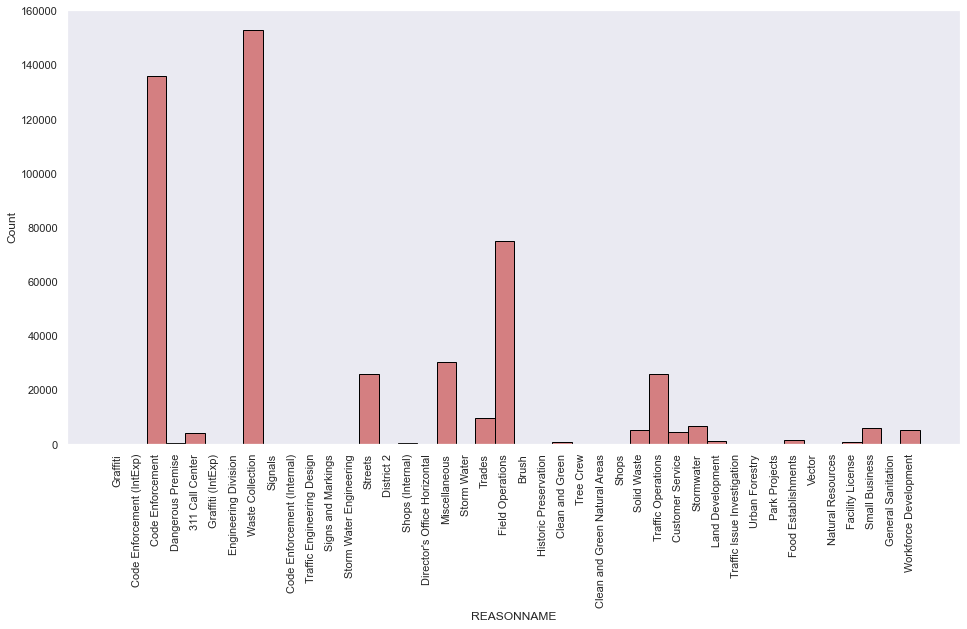

In [98]:
plt.figure(figsize=(16,8))
sns.set(style="dark")
sns.histplot(df.REASONNAME, color='indianred', edgecolor='black')
plt.xticks(rotation=90)
plt.show()

## Takeaways:
- Maybe we could amke this easier to manage and combine some of these?
    - Waste Collection + Solid Waste
        - Into just 'Waste Management'
    - Storm Water + Storm Water Engineering + Stormwater 
        - Into 'Storm Water Managemnt'
    - Ect.

___

## Case Status Data Info

In [99]:
df.CaseStatus.value_counts()

Closed    441387
Open       54053
Name: CaseStatus, dtype: int64

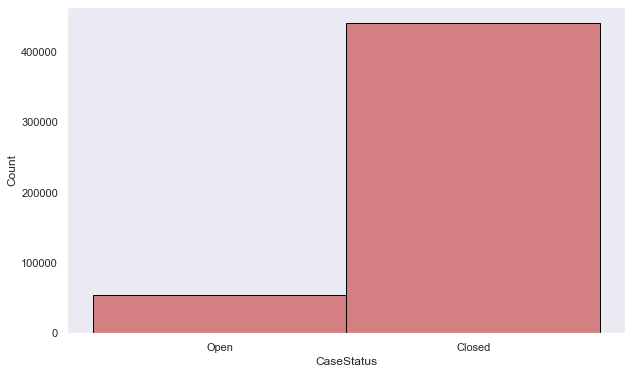

In [100]:
plt.figure(figsize=(10,6))
sns.set(style="dark")
sns.histplot(df.CaseStatus, color='indianred', edgecolor='black')
plt.show()

## Takeaways:
- 89.09% of cases are closed
- 10.91% are open

___

## Source Data Info

In [101]:
df.SourceID.value_counts()

Web Portal                    395339
311 Mobile App                 55306
Constituent Call               41340
Internal Services Requests      3455
Name: SourceID, dtype: int64

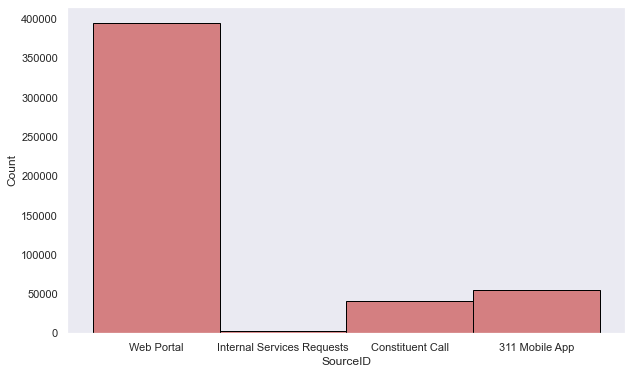

In [102]:
plt.figure(figsize=(10,6))
sns.set(style="dark")
sns.histplot(df.SourceID, color='indianred', edgecolor='black')
plt.show()

## Takeaways:
- More people tend to use the Web Portal to report issues.
- Is there a possible link to which form of reporting is responded to quickest and slowest?

___

## Council District Data Info

In [103]:
df['Council District'].value_counts()

5     67022
1     66543
2     65327
3     62330
4     46830
7     46377
6     42719
10    40062
8     27924
9     27473
0      2833
Name: Council District, dtype: int64

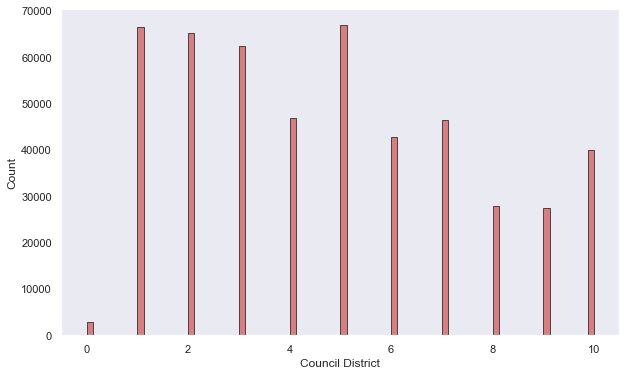

In [104]:
plt.figure(figsize=(10,6))
sns.set(style="dark")
sns.histplot(df['Council District'], color='indianred', edgecolor='black')
plt.show()

## Takeaways:
- Districts 1, 2, 3, & 5 have higher reports
- District 0 has nearly no reports in comparison to the others
- 4, 6, 7, 8, 9, & 10 still have many reports but not as much as 1, 2, 3, and 5

___

## More info on my reasoning
- I didnt look at the following features in depth
    - Opened date and time
    - sla date
    - closed date time
    - type name
    - object decription
    - x and y cordinates
    - report start and end dates
- The reason I didnt make univaraites for these is because There were so many different itterations that it became unruley

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495440 entries, 0 to 495439
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Category              495440 non-null  object 
 1   CASEID                495440 non-null  int64  
 2   OPENEDDATETIME        495440 non-null  object 
 3   SLA_Date              481300 non-null  object 
 4   CLOSEDDATETIME        441387 non-null  object 
 5   Late (Yes/No)         495440 non-null  object 
 6   Dept                  445141 non-null  object 
 7   REASONNAME            495440 non-null  object 
 8   TYPENAME              495440 non-null  object 
 9   CaseStatus            495440 non-null  object 
 10  SourceID              495440 non-null  object 
 11  OBJECTDESC            495440 non-null  object 
 12  Council District      495440 non-null  int64  
 13  XCOORD                495345 non-null  float64
 14  YCOORD                495345 non-null  float64
 15  

___

### Lori's Funcitons
- square feet by days late

### John Funcitons
- Month of the case
- Day of the week of the case
- Year of the case

### Sam Functions
- Population density by district

### Gabby Funcitons
- Voter turnout by district

### Caitlyn Functions
- Make a new feature 'pct_of_time_used"
    - hold how from due date was the case closed
- re-bin based on new feature

___

# Prepare

### Caitlyn Functions
- Make a new feature 'pct_of_time_used"
    - hold how from due date was the case closed
- re-bin based on new feature
        - Extremely early
        - resolved very early
        - resolved early
        - resolved on time
        - resolved late
        - resolved very late
        - Extremely late

In [106]:
df.shape
# start 495k

(495440, 17)

In [107]:
from datetime import date

In [108]:
# make sure the open and closed date columns are formatted in datetime format
df['OPENEDDATETIME'] = pd.to_datetime(df['OPENEDDATETIME'])
df['CLOSEDDATETIME'] = pd.to_datetime(df['CLOSEDDATETIME'])
df['SLA_Date'] = pd.to_datetime(df['SLA_Date'])

In [109]:
df.shape

(495440, 17)

In [110]:
# create new number of days open feature
df['days_open'] = df['CLOSEDDATETIME'] - df['OPENEDDATETIME']
# Create new column to hold days before needed resolution
df['resolution_days_due'] = df['SLA_Date'] - df['OPENEDDATETIME']

In [111]:
df.shape

(495440, 19)

In [112]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
days_open               54053
resolution_days_due     14140
dtype: int64

In [113]:
# Convert to string format insted of timedelta
df['days_open'] = df.days_open // pd.Timedelta('1d')
# Convert to string format insted of timedelta
df['resolution_days_due'] = df.resolution_days_due // pd.Timedelta('1d')

In [114]:
df['days_open'] = df['days_open'].fillna(0)

In [115]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
days_open                   0
resolution_days_due     14140
dtype: int64

In [116]:
df['resolution_days_due'] = df['resolution_days_due'] + 1

In [117]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
days_open                   0
resolution_days_due     14140
dtype: int64

In [118]:
# create new feature to show how long it took to resolve compared to resolution due date
#df['days_before_or_after_due'] = df.resolution_days_due - df.days_open
# postitive means before days before due data and negative means number of days after due
df.sample(1)


,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,days_open,resolution_days_due
306270,No Category,1016573532,2020-12-11,2020-12-17,2020-12-14,NO,Solid Waste Management,Miscellaneous,Illegal Dumping,Closed,Web Portal,FREDERICKSBURG RD and WEST DR,1,2121781.0,13713878.0,5/15/2020,5/15/2021,3.0,7.0


In [119]:
# create new feature to show how long it took to resolve compared to resolution due date
df['pct_time_of_used'] = df.days_open / df.resolution_days_due
# postitive means before days before due data and negative means number of days after due
df.sample(1)

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,days_open,resolution_days_due,pct_time_of_used
103559,No Category,1016263333,2020-06-29,NaT,2020-06-29,NO,Development Services,Code Enforcement,Field Study Report,Closed,311 Mobile App,"7439 FIELDGATE, SAN ANTONIO, 78227",6,2081603.0,13703477.0,5/15/2020,5/15/2021,0.0,NaN,NaN


In [120]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
days_open                   0
resolution_days_due     14140
pct_time_of_used        14140
dtype: int64

In [121]:
df.nsmallest(1, ['pct_time_of_used'])

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,days_open,resolution_days_due,pct_time_of_used
0,Graffiti,1010444245,2012-08-15,2012-08-30,NaT,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,Web Portal,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,5/15/2020,5/15/2021,0.0,16.0,0.0


In [122]:
df.shape

(495440, 20)

In [123]:
df[(df['pct_time_of_used'] > 100.0) & (df['pct_time_of_used'] < 200.0)]

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,SourceID,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,days_open,resolution_days_due,pct_time_of_used
131,Information,1011173664,2013-12-16,2014-01-02,2020-11-04,YES,Customer Service,311 Call Center,Complaint,Closed,Constituent Call,"314 HOLLYWOOD AV W, San Antonio, 78212",1,2128217.0,13716540.0,5/15/2020,5/15/2021,2515.0,18.0,139.722222
132,Information,1011175190,2013-12-17,2014-01-03,2020-11-04,YES,Customer Service,311 Call Center,Complaint,Closed,Constituent Call,"12907 WAYNESBORO, San Antonio, 78233",10,2170381.0,13750902.0,5/15/2020,5/15/2021,2514.0,18.0,139.666667
133,Information,1011175611,2013-12-17,2014-01-03,2020-11-04,YES,Customer Service,311 Call Center,Complaint,Closed,Constituent Call,"1906 INDIAN MEADOWS, San Antonio, 78230",8,2100026.0,13751158.0,5/15/2020,5/15/2021,2514.0,18.0,139.666667
136,Information,1011177202,2013-12-18,2014-01-06,2020-11-04,YES,Customer Service,311 Call Center,Complaint,Closed,Constituent Call,"4702 BOHILL DR, San Antonio, 78217",10,2159251.0,13754284.0,5/15/2020,5/15/2021,2513.0,20.0,125.650000
137,Information,1011177202,2013-12-18,2014-01-06,2020-11-04,YES,Customer Service,311 Call Center,Complaint,Closed,Constituent Call,"4702 BOHILL DR, San Antonio, 78217",10,2159251.0,13754284.0,5/15/2020,5/15/2021,2513.0,20.0,125.650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266452,No Category,1016494753,2020-11-05,2020-11-05,2021-03-15,YES,Animal Care Services,Field Operations,Cruelty-Neglect(Animal Cruelty),Closed,Web Portal,"1531 S CALLAGHAN RD, SAN ANTONIO",6,2095856.0,13699633.0,5/15/2020,5/15/2021,130.0,1.0,130.000000
268247,No Category,1016498447,2020-11-06,2020-11-06,2021-04-16,YES,Animal Care Services,Field Operations,Cruelty-Neglect(Animal Cruelty),Closed,Web Portal,"2400 OAKHILL RD, SAN ANTONIO, 78238",6,2092919.0,13714779.0,5/15/2020,5/15/2021,161.0,1.0,161.000000
269186,No Category,1016500076,2020-11-08,2020-11-08,2021-03-23,YES,Animal Care Services,Field Operations,Cruelty-Neglect(Animal Cruelty),Closed,Web Portal,"5427 MIDDLEFIELD DR, SAN ANTONIO, 78242",4,2095080.0,13680312.0,5/15/2020,5/15/2021,135.0,1.0,135.000000
300789,No Category,1016562919,2020-12-06,2020-12-06,2021-05-04,YES,Animal Care Services,Field Operations,Cruelty-Neglect(Animal Cruelty),Closed,Web Portal,"213 COLFAX ST, SAN ANTONIO, 78228",7,2103204.0,13714930.0,5/15/2020,5/15/2021,149.0,1.0,149.000000


In [124]:
    df['level_of_delay'] = pd.cut(df.pct_time_of_used, 
                            bins = [-20.0,0.5,0.75,1.0,15,800],
                            labels = ['Very Early Response', 
                                      'Early Response', "On Time Response", "Late Response", 
                                      'Very Late Response'])

In [125]:
df.shape

(495440, 21)

In [42]:
df.sample(1)

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,...,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,days_open,resolution_days_due,pct_time_of_used,level_of_delay
344310,No Category,1016645363,2021-01-20,2021-01-25,NaT,YES,Development Services,Code Enforcement,Graffiti (Public Property),Open,...,IH 10 W ACCESS RD and IH 35 N ACCESS RD,1,2127613.0,13704534.0,5/15/2020,5/15/2021,0.0,6.0,0.0,Extremely Early Response


In [126]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
days_open                   0
resolution_days_due     14140
pct_time_of_used        14140
level_of_delay          14140
dtype: int64

In [127]:
df.level_of_delay.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
495435    False
495436    False
495437    False
495438    False
495439    False
Name: level_of_delay, Length: 495440, dtype: bool

In [128]:
# drop nulls in these columns
df.dropna(subset=['days_open'], how='all', inplace=True)

In [129]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
days_open                   0
resolution_days_due     14140
pct_time_of_used        14140
level_of_delay          14140
dtype: int64

In [130]:
df.shape

(495440, 21)

In [131]:
df.level_of_delay.value_counts()

Very Early Response    385998
Late Response           35740
Early Response          28246
On Time Response        23550
Very Late Response       7766
Name: level_of_delay, dtype: int64

In [132]:
df.dropna(subset=['level_of_delay'], how='all', inplace=True)

In [133]:
df.shape

(481300, 21)

In [134]:
df.level_of_delay.value_counts()

Very Early Response    385998
Late Response           35740
Early Response          28246
On Time Response        23550
Very Late Response       7766
Name: level_of_delay, dtype: int64

In [51]:
# add a new category for level of delay
#df["level_of_delay"] = df['level_of_delay'].cat.add_categories('Still Open')

In [52]:
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,...,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,days_open,resolution_days_due,pct_time_of_used,level_of_delay
0,Graffiti,1010444245,2012-08-15,2012-08-30,NaT,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,...,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,5/15/2020,5/15/2021,0.0,16.0,0.0,Extremely Early Response
1,Property Maintenance,1010888252,2013-06-06,2013-08-09,NaT,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,...,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,5/15/2020,5/15/2021,0.0,65.0,0.0,Extremely Early Response
2,Property Maintenance,1010966128,2013-07-19,2013-09-23,NaT,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,...,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,5/15/2020,5/15/2021,0.0,67.0,0.0,Extremely Early Response
3,Property Maintenance,1011052825,2013-09-16,2013-09-30,NaT,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,...,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,5/15/2020,5/15/2021,0.0,15.0,0.0,Extremely Early Response
4,Property Maintenance,1011052826,2013-09-16,2013-09-30,NaT,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,...,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,5/15/2020,5/15/2021,0.0,15.0,0.0,Extremely Early Response


In [53]:
# replace nulls in level of delay with "Still Open"
#df["level_of_delay"].fillna("Still Open", inplace=True)
df.head()

,Category,CASEID,OPENEDDATETIME,SLA_Date,CLOSEDDATETIME,Late (Yes/No),Dept,REASONNAME,TYPENAME,CaseStatus,...,OBJECTDESC,Council District,XCOORD,YCOORD,Report Starting Date,Report Ending Date,days_open,resolution_days_due,pct_time_of_used,level_of_delay
0,Graffiti,1010444245,2012-08-15,2012-08-30,NaT,YES,Code Enforcement Services,Graffiti,Graffiti Public Property,Open,...,"600 NOGALITOS ST, San Antonio, 78204",5,2125683.0,13695548.0,5/15/2020,5/15/2021,0.0,16.0,0.0,Extremely Early Response
1,Property Maintenance,1010888252,2013-06-06,2013-08-09,NaT,YES,Code Enforcement Services,Code Enforcement (IntExp),Alley-Way Maintenance,Open,...,"6043 CASTLE QUEEN, San Antonio, 78218",2,2169702.0,13725769.0,5/15/2020,5/15/2021,0.0,65.0,0.0,Extremely Early Response
2,Property Maintenance,1010966128,2013-07-19,2013-09-23,NaT,YES,Code Enforcement Services,Code Enforcement (IntExp),Junk Vehicle On Private Property,Open,...,"842 KIRK PL, San Antonio, 78226",5,2116192.0,13692260.0,5/15/2020,5/15/2021,0.0,67.0,0.0,Extremely Early Response
3,Property Maintenance,1011052825,2013-09-16,2013-09-30,NaT,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,...,"54 KENROCK RIDGE, San Antonio, 78254",7,2082242.0,13737817.0,5/15/2020,5/15/2021,0.0,15.0,0.0,Extremely Early Response
4,Property Maintenance,1011052826,2013-09-16,2013-09-30,NaT,YES,Code Enforcement Services,Code Enforcement,Right Of Way/Sidewalk Obstruction,Open,...,"74 KENROCK RIDGE, San Antonio, 78254",7,2082389.0,13737877.0,5/15/2020,5/15/2021,0.0,15.0,0.0,Extremely Early Response


___

## Put it all into a function

In [54]:
df = pd.read_csv('service_calls.csv')

In [55]:
df.shape

(495440, 17)

In [56]:
df.isnull().sum()

Category                    0
CASEID                      0
OPENEDDATETIME              0
SLA_Date                14140
CLOSEDDATETIME          54053
Late (Yes/No)               0
Dept                    50299
REASONNAME                  0
TYPENAME                    0
CaseStatus                  0
SourceID                    0
OBJECTDESC                  0
Council District            0
XCOORD                     95
YCOORD                     95
Report Starting Date        0
Report Ending Date          0
dtype: int64

In [57]:
def drop_and_index(df):
    """
    This function will take in one positional argurment:
    1.  311 df
    This function will perform the following operations to the df:
    1.  Drop category, drop report starting date, and drop report
    ending date
    2.  Set CASEID as the index
    """
    # Drop category, report starting date, and report ending date
    df.drop(columns=['Category', 
                 'Report Starting Date', 
                 'Report Ending Date' ], inplace=True)
    # Set index to case id
    df.set_index('CASEID', inplace=True)
    return df

In [58]:
df = drop_and_index(df)

In [59]:
df.isnull().sum()

OPENEDDATETIME          0
SLA_Date            14140
CLOSEDDATETIME      54053
Late (Yes/No)           0
Dept                50299
REASONNAME              0
TYPENAME                0
CaseStatus              0
SourceID                0
OBJECTDESC              0
Council District        0
XCOORD                 95
YCOORD                 95
dtype: int64

In [60]:
df.shape

(495440, 13)

In [61]:
def handle_nulls(df):
    '''This funciton takes in data frame
    drops nulls for specified features
    replaces nulls with "Unknown" for specific feature
    removes observations where City Council is the Department'''
    # drop null values
    df.dropna(subset = ['SLA_Date', 'XCOORD', 'YCOORD'], inplace = True)
    # replace null values
    df.fillna({'Dept': 'Unknown'}, inplace = True)
    # remove city council department
    df = df[df.Dept != 'City Council']
    # return df
    return df

In [62]:
df = handle_nulls(df)


In [63]:
df.isnull().sum()

OPENEDDATETIME          0
SLA_Date                0
CLOSEDDATETIME      49509
Late (Yes/No)           0
Dept                    0
REASONNAME              0
TYPENAME                0
CaseStatus              0
SourceID                0
OBJECTDESC              0
Council District        0
XCOORD                  0
YCOORD                  0
dtype: int64

In [64]:
df.shape

(481205, 13)

In [65]:
def create_delay_columns(df):
    '''This funciton takes in the dataframe
    reformats specified columns into datetime format
    create 2 columns to see time a case was open 
    and the time it was given for a resolution to be found
    create another feature for how long it took 
        compare to due date for a resolution to be found
    bin how long it took compared to due date
    fill nulls with "Still Open"
    return df
    '''
    # make sure the open and closed date columns are formatted in datetime format
    df['OPENEDDATETIME'] = pd.to_datetime(df['OPENEDDATETIME'])
    df['CLOSEDDATETIME'] = pd.to_datetime(df['CLOSEDDATETIME'])
    df['SLA_Date'] = pd.to_datetime(df['SLA_Date'])
    # create new number of days open feature
    df['days_open'] = df['CLOSEDDATETIME'] - df['OPENEDDATETIME']
    # Create new column to hold days before needed resolution
    df['resolution_days_due'] = df['SLA_Date'] - df['OPENEDDATETIME']
    # Convert to string format insted of timedelta
    df['days_open'] = df.days_open // pd.Timedelta('1d')
    # Convert to string format insted of timedelta
    df['resolution_days_due'] = df.resolution_days_due // pd.Timedelta('1d')
    # create new feature to show how long it took to resolve compared to resolution due date
    df['days_before_or_after_due'] = df.resolution_days_due - df.days_open
    # replace null values in days open with 0
    df['days_open'] = df['days_open'].fillna(0)
    # add 1 to resolution days to offset future issues with upcoming feature
    df['resolution_days_due'] = df['resolution_days_due'] + 1
    # create new feature to show how long it took to resolve compared to resolution due date
    df['pct_time_of_used'] = df.days_open / df.resolution_days_due
    # bin the new feature
    df['level_of_delay'] = pd.cut(df.pct_time_of_used, 
                            bins = [-20.0,0.25,0.5,0.75,1.0,15,100,800],
                            labels = ['Extremely Early Response', 'Very Early Response', 
                                      'Early Response', "On Time Response", "Late Response", 
                                      'Very Late Response', 'Extremely Late Response'])
    # drop nulls in these columns
    df.dropna(subset=['days_open'], how='all', inplace=True)
    df.dropna(subset=['level_of_delay'], how='all', inplace=True)
    # return df
    return df

In [66]:
df = create_delay_columns(df)

In [67]:
df.isnull().sum()

OPENEDDATETIME                  0
SLA_Date                        0
CLOSEDDATETIME              49509
Late (Yes/No)                   0
Dept                            0
REASONNAME                      0
TYPENAME                        0
CaseStatus                      0
SourceID                        0
OBJECTDESC                      0
Council District                0
XCOORD                          0
YCOORD                          0
days_open                       0
resolution_days_due             0
days_before_or_after_due    49509
pct_time_of_used                0
level_of_delay                  0
dtype: int64

In [68]:
df.shape

(481205, 18)

In [69]:
def handle_outliers(df):
    '''removes outiers from df'''
    # remove outliers from days_open
    df = df[df.days_open < 1400]
    # return df
    return df

In [70]:
df = handle_outliers(df)

In [71]:
df.isnull().sum()

OPENEDDATETIME                  0
SLA_Date                        0
CLOSEDDATETIME              49509
Late (Yes/No)                   0
Dept                            0
REASONNAME                      0
TYPENAME                        0
CaseStatus                      0
SourceID                        0
OBJECTDESC                      0
Council District                0
XCOORD                          0
YCOORD                          0
days_open                       0
resolution_days_due             0
days_before_or_after_due    49509
pct_time_of_used                0
level_of_delay                  0
dtype: int64

In [72]:
df.shape

(480129, 18)

In [73]:
def create_dummies(df):
    '''This function creates dummy variables for Council Districts'''
    # Drop district 0
    df = df[df['Council District'] != 0]
    # set what we are going to create these dummies from
    dummy_df =  pd.get_dummies(df['Council District'])
    # Name the new columns
    dummy_df.columns = ['district_1', 'district_2', 
                        'district_3', 'district_4', 'district_5',
                        'district_6', 'district_7', 'district_8',
                        'district_9', 'district_10']
    # add the dummies to the data frame
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [74]:
df = create_dummies(df)

In [75]:
df.isnull().sum()

OPENEDDATETIME                  0
SLA_Date                        0
CLOSEDDATETIME              49293
Late (Yes/No)                   0
Dept                            0
REASONNAME                      0
TYPENAME                        0
CaseStatus                      0
SourceID                        0
OBJECTDESC                      0
Council District                0
XCOORD                          0
YCOORD                          0
days_open                       0
resolution_days_due             0
days_before_or_after_due    49293
pct_time_of_used                0
level_of_delay                  0
district_1                      0
district_2                      0
district_3                      0
district_4                      0
district_5                      0
district_6                      0
district_7                      0
district_8                      0
district_9                      0
district_10                     0
dtype: int64

In [76]:
df.shape

(477550, 28)

In [77]:
def clean_reason(df):
    '''
    This function will take in the service call df and replace the content of REASONNAME column with condensed names
    '''
    # replace with waste
    df['REASONNAME'] = df['REASONNAME'].replace(['Waste Collection', 'Solid Waste', 'Brush'], 'waste')
    # replace with code
    df['REASONNAME'] = df['REASONNAME'].replace(['Code Enforcement', 'Code Enforcement (Internal)', 'Code Enforcement (IntExp)'], 'code')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Field Operations', 'Vector'], 'field')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace('Miscellaneous', 'misc')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Traffic Operations', 'Traffic Engineering Design', 'Traffic Issue Investigation'], 'traffic')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Streets', 'Signals', 'Signs and Markings'], 'streets')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace('Trades', 'trades')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Stormwater', 'Storm Water', 'Storm Water Engineering'], 'storm')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Small Business', 'Food Establishments', 'Shops (Internal)', 'Shops'], 'business')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace('Workforce Development', 'workforce')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Customer Service', '311 Call Center', 'Director\'s Office Horizontal'], 'customer_service')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Land Development', 'Clean and Green', 'Urban Forestry', 'Natural Resources', 'Park Projects', 'Tree Crew', 'District 2', 'Clean and Green Natural Areas'], 'land')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace('Facility License', 'license')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Dangerous Premise','Historic Preservation', 'Engineering Division'], 'buildings')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Graffiti (IntExp)', 'General Sanitation', 'Graffiti'], 'cleanup')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Waste Collection', 'Solid Waste'], 'waste')
    # replace with
    df['REASONNAME'] = df['REASONNAME'].replace(['Waste Collection', 'Solid Waste'], 'waste')
    return df

In [78]:
df = clean_reason(df)

In [79]:
df.isnull().sum()

OPENEDDATETIME                  0
SLA_Date                        0
CLOSEDDATETIME              49293
Late (Yes/No)                   0
Dept                            0
REASONNAME                      0
TYPENAME                        0
CaseStatus                      0
SourceID                        0
OBJECTDESC                      0
Council District                0
XCOORD                          0
YCOORD                          0
days_open                       0
resolution_days_due             0
days_before_or_after_due    49293
pct_time_of_used                0
level_of_delay                  0
district_1                      0
district_2                      0
district_3                      0
district_4                      0
district_5                      0
district_6                      0
district_7                      0
district_8                      0
district_9                      0
district_10                     0
dtype: int64

In [80]:
df.shape

(477550, 28)

In [81]:
def clean_column_names(df):
    '''This function reads in a dataframe as a positional argument, makes the column names easier to call and
    more python friendly. It also extracts the zip code from the address column. It then returns a cleaned data 
    frame.'''
    df= df.rename(columns={
                    'Category':'category', 'OPENEDDATETIME':'open_date', 'Dept': 'dept',
                    'SLA_Date':'due_date', 'CLOSEDDATETIME': 'closed_date', 'Late (Yes/No)': 'is_late',
                    'OBJECTDESC': 'address', 'REASONNAME': 'call_reason', 'TYPENAME': 'case_type', 
                    'Council District': 'council_district', 'CASEID': 'case_id',
                    'CaseStatus': 'case_status', 'SourceID':'source_id', 'XCOORD': 'longitude', 'YCOORD': 'latitude',
                    'Report Starting Date': 'report_start_date', 'Report Ending Date': 'report_end_date'
                      })
    df['zipcode'] = df['address'].str.extract(r'.*(\d{5}?)$')  
    #drop zipcode nulls after obtaining zipcode
    df.dropna(subset=['zipcode'], how='all', inplace=True)
    return df

In [82]:
df = clean_column_names(df)

In [83]:
df.isnull().sum()

open_date                       0
due_date                        0
closed_date                 43182
is_late                         0
dept                            0
call_reason                     0
case_type                       0
case_status                     0
source_id                       0
address                         0
council_district                0
longitude                       0
latitude                        0
days_open                       0
resolution_days_due             0
days_before_or_after_due    43182
pct_time_of_used                0
level_of_delay                  0
district_1                      0
district_2                      0
district_3                      0
district_4                      0
district_5                      0
district_6                      0
district_7                      0
district_8                      0
district_9                      0
district_10                     0
zipcode                         0
dtype: int64

In [84]:
df.shape

(399986, 29)